In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Decision tree for classification
---
Classification-tree

Sequence of if-else questions about individual features.

Objective: infer class labels

Able to caputre non-linear relationships between features and labels

Don't require feature scaling(e.g. Standardization)

Decision Regions

Decision region: region in the feature space where all instances are assigned to one class label

Decision Boundary: surface separating different decision regions

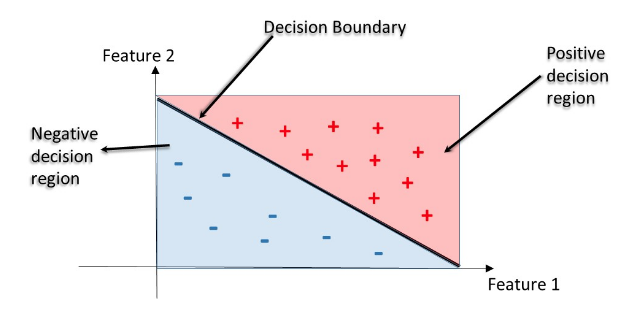

Mounted at /content/drive


**Train your first classification tree**

In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository.

You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [2]:
wbc = pd.read_csv('data.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
wbc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
#dt = DecisionTreeClassifier(max_depth=6, criterion='entropy',random_state=1)
dt = DecisionTreeClassifier(max_depth=6,random_state=1)


# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


In [7]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, dt.predict(X_train))
print("Train set accuracy: {:.2f}".format(acc))

Train set accuracy: 0.96


In [8]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


**Evaluate the classification tree**

In [9]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers

    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

**Logistic regression vs classification tree**


A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


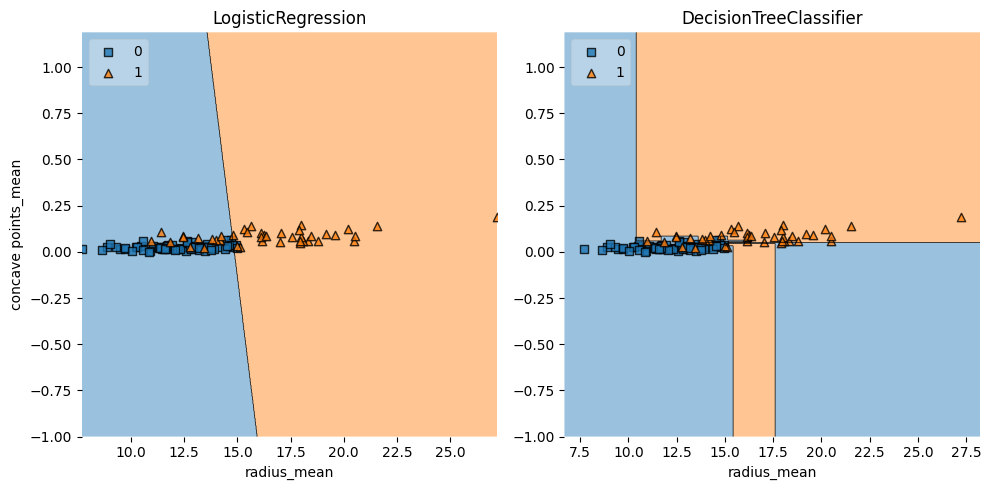

In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)



# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


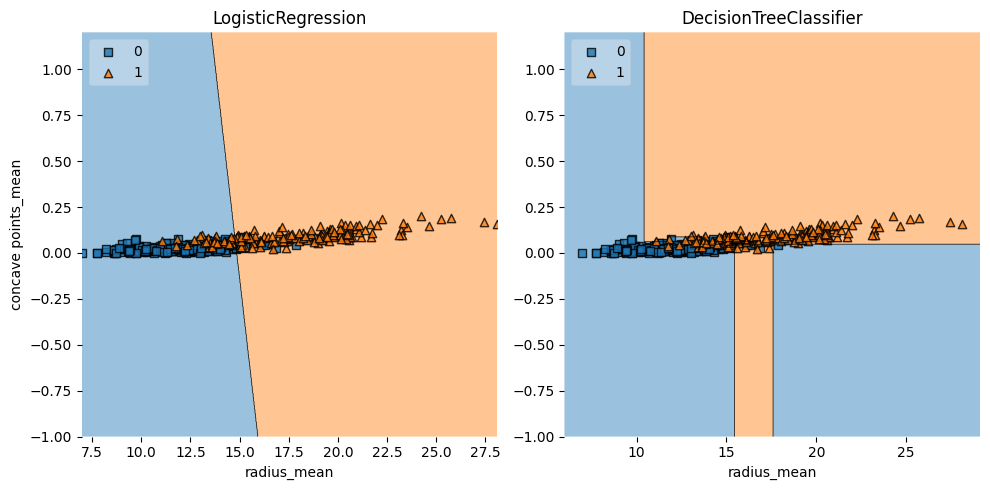

In [11]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_train, y_train, clfs)

In [12]:
acc = accuracy_score(y_train,logreg.predict(X_train))
acc1 = accuracy_score(y_train,dt.predict(X_train))
print("Train set accuracy of Logiostic Regression: {:.2f}".format(acc))
print("Train set accuracy of Decision Tree: {:.2f}".format(acc1))

Train set accuracy of Logiostic Regression: 0.89
Train set accuracy of Decision Tree: 0.96


In [13]:
acc = accuracy_score(y_test,logreg.predict(X_test))
acc1 = accuracy_score(y_test,dt.predict(X_test))
print("Train set accuracy of Logiostic Regression: {:.2f}".format(acc))
print("Train set accuracy of Decision Tree: {:.2f}".format(acc1))

Train set accuracy of Logiostic Regression: 0.88
Train set accuracy of Decision Tree: 0.89


**Entropy vs Gini**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

**Decision tree for regression**

**Train your first regression tree**

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mpg = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ML Programs/DecisionTree/auto-mpg.csv')
mpg.head()

In [ ]:
mpg = pd.get_dummies(mpg)
mpg.head()

In [ ]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

**Evaluate the regression tree**

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [ ]:
from sklearn.metrics import mean_squared_error

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

**Linear regression vs regression tree**

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))